# End-to-End 머신러닝 프로젝트

부동산 회사에 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트를 처음부터 끝까지 (End-to-Enf) 진행하겠습니다. 주요 단계는 다음과 같습니다

1. 큰 그림을 봅니다 (look at the big picture).
2. 데이터를 구합니다 (get the data).
3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다 (discover and visualize the data to gain insights).
4. 머신러닝 알고리즘을 위해 데이터를 준비합니다 (prepare the data for Machine Learning algorithms).
5. 모델을 선택하고 훈련시킵니다 (select a model and train it).
6. 모델을 상세하게 조정합니다 (fine-tune your model).
7. 솔루션을 제시합니다 (present your solution).
8. 시스템을 론칭하고 모니터링하고 유지 보수합니다 (launch, monitor, and maintain your system).

이 예제 프로젝트를 위해서 캘리포니아 주택 가격 데이터셋을 사용합니다. 이 데이터셋은 1990년 캘리포니아 인구조사 데이터를 기반으로 합니다.

<div>
<img src="images/fig2-1.png" width="800"/>
</div>

## 1. 큰 그림 보기 (Look at the Big Picture)

풀어야 할 문제: 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것

이 모델이 전체 시스템 안에서 어떻게 사용될 지를 이해하는 것이 중요합니다.

<div>
<img src="images/fig2-2.png" width="800"/>
</div>

중요한 질문: 현재 솔루션은? 전문가가 수동으로? 복잡한 규칙? 머신러닝?

### 문제 정의
- 지도학습(supervised learning), 비지도학습(unsupervised learning), 강화학습(reinforcement learning) 중에 어떤 경우에 해당하는가?
- 분류문제(classification)인가 아니면 회귀문제(regresssion)인가?
- 배치학습(batch learning), 온라인학습(online learning) 중 어떤 것을 사용해야 하는가?

### 성능측정지표(performance measure) 선택

평균제곱근 오차(root mean square error (RMSE))

$\mathrm{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(h\left(\mathbf{x}^{(i)}\right)-y^{(i)}\right)^2}$

- $m$: 데이터셋에 있는 샘플 수
- $\mathbf{x}^{(i)}$: $i$번째 샘플의 전체 특성값의 벡터(vector)
- $y^{(i)}$: $i$번째 샘플의 label(해당 샘플의 기대 출력값)
\begin{align*}
\mathbf{x}^{(1)} = \begin{bmatrix}
           -118.29 \\
           33.91 \\
           1,416 \\
           38,372
\end{bmatrix}
\end{align*}

$$y^{(1)} = 156,400$$
- $\mathbf{X}$: 데이터셋 모든 샘플의 모든 특성값(features)을 포함하는 행렬(matrix)
\begin{align*}
\mathbf{X} = \begin{bmatrix}
           \left(\mathbf{x}^{(1)}\right)^T \\
           \left(\mathbf{x}^{(2)}\right)^T \\
           \vdots \\
           \left(\mathbf{x}^{(2000)}\right)^T
           \end{bmatrix}
           = \begin{bmatrix}
           -188.29 & 33.91 & 1,416 & 38,372 \\
           \vdots & \vdots & \vdots & \vdots
           \end{bmatrix}
\end{align*}

- $h$: 예측함수(prediction function). 하나의 샘플 $\mathbf{x}^{(i)}$에 대해 예측값 $\hat{y}^{(i)} = h\left(\mathbf{x}^{(i)}\right)$를 출력함.
- $\mathrm{RMSE}(\mathbf{X}, h)$: 모델 $h$가 얼마나 좋은지 평가하는 지표, 또는 비용함수(cost function)

## 2. 데이터 가져오기 (Get the Data)

- 작업환경 설정

```
$ export ML_PATH="$HOME/ml" # You can change the path if you prefer
$ mkdir -p $ML_PATH

$ python3 -m pip --version
pip 19.3.1 from [...]/lib/python3.7/site-packages/pip (python 3.7)

$ python3 -m pip install --user -U pip
Collecting pip
[...]
Successfully installed pip-19.3.1
```

- 독립적인 환경(isolated environment) 만들기 

```
$ python3 -m pip install --user -U virtualenv
Collecting virtualenv
[...]
Successfully installed virtualenv-16.7.6

$ cd $ML_PATH
$ python3 -m virtualenv my_env
Using base prefix '[...]'
New python executable in [...]/ml/my_env/bin/python3
Also creating executable in [...]/ml/my_env/

$ cd $ML_PATH
$ source my_env/bin/activate # on Linux or macOS
$ .\my_env\Scripts\activate # on Windows
```

- 필요한 패키지들 설치하기

```
$ python3 -m pip install -U jupyter matplotlib numpy pandas scipy scikit-learn
Collecting jupyter
Downloading https://[...]/jupyter-1.0.0-py2.py3-none-any.whl
Collecting matplotlib
[...]
```

- 커널을 Jupyter에 등록하고 이름 정하기
```
$ python3 -m ipykernel install --user --name=python3
```

- Jupyter 실행
```
$ jupyter notebook
[...] Serving notebooks from local directory: [...]/ml
[...] The Jupyter Notebook is running at:
[...] http://localhost:8888/?token=60995e108e44ac8d8865a[...]
[...] or http://127.0.0.1:8889/?token=60995e108e44ac8d8865a[...]
[...] Use Control-C to stop this server and shut down all kernels [...]
```

<div>
<img src="images/fig2-3.png" width="800"/>
</div>

<div>
<img src="images/fig2-4.png" width="800"/>
</div>

### 데이터 다운로드

In [48]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [49]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data를 호출하면 현재 작업공간에 datasets/housing 디렉토리를 만들고 housing.tgz 파일을 내려받고 압축을 풀어 housing.csv 파일을 만듭니다.

In [50]:
fetch_housing_data()

In [51]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 데이터 구조 훑어보기

In [52]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity: 범주형(categorical) 필드

In [54]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe(): 숫자형 특성의 정보를 요약

In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


히스토그램으로 데이터 분석해보기

Saving figure attribute_histogram_plots


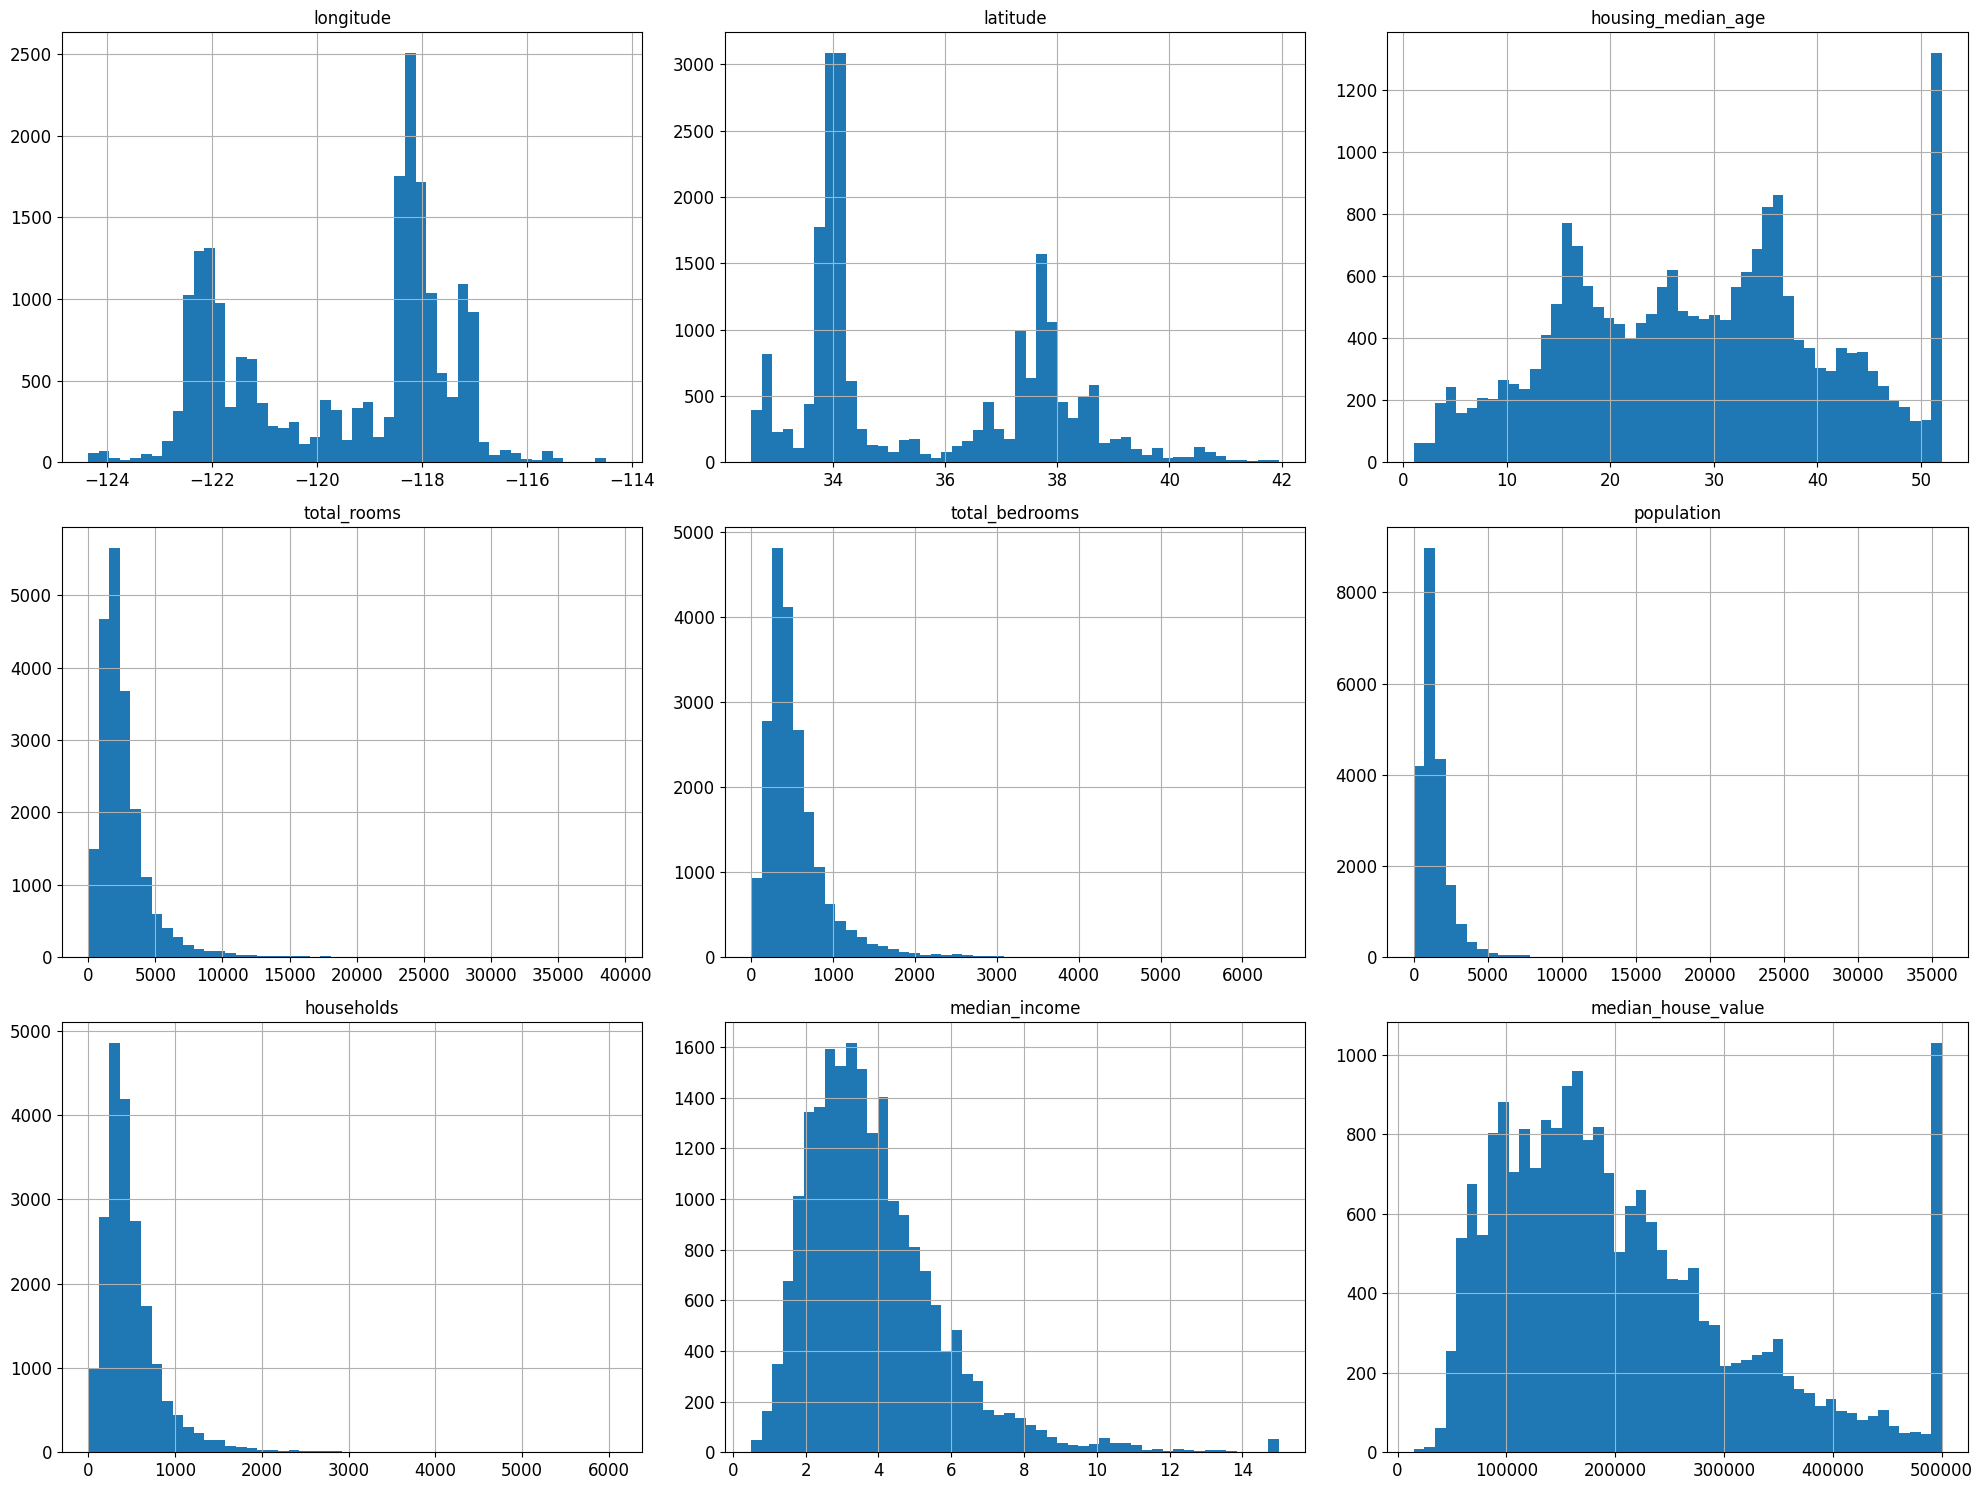

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### 테스트 데이터셋 만들기

좋은 모델을 만들기 위해선 훈련에 사용되지 않고 모델평가만을 위해서 사용될 "테스트 데이터셋"을 따로 구분하는 것이 필요합니다. 테스트 데이터셋을 별도로 생성할 수도 있지만 프로젝트 초기의 경우 하나의 데이터셋을 훈련, 테스트용으로 분리하는 것이 일반적입니다.

In [57]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [58]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [59]:
a = np.random.permutation(10)
a

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [60]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set), len(test_set)

(16512, 4128)

- 위 방법은 문제점은?
- 해결방안: 각 샘플의 식별자(identifier)를 사용해서 분할

In [61]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

인덱스를 id로 추가하기

In [62]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

- 위 방법의 문제점은?
- Id를 만드는 데 안전한 feature들을 사용해야 함

In [63]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [64]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [65]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


Scikit-Learn에서 기본적으로 제공되는 데이터분할 함수

In [66]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### 계층적 샘플링(stratified sampling)
- 전체 데이터를 계층(strata)라는 동질의 그룹으로 나누고, 테스트 데이터가 전체 데이터를 잘 대표하도록 각 계층에서 올바른 수의 샘플을 추출

<AxesSubplot: >

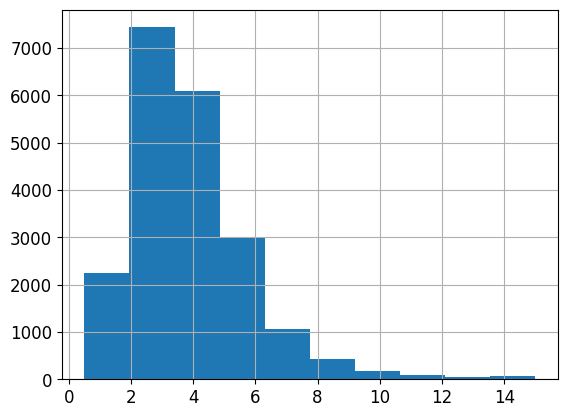

In [67]:
housing["median_income"].hist()

In [68]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [69]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot: >

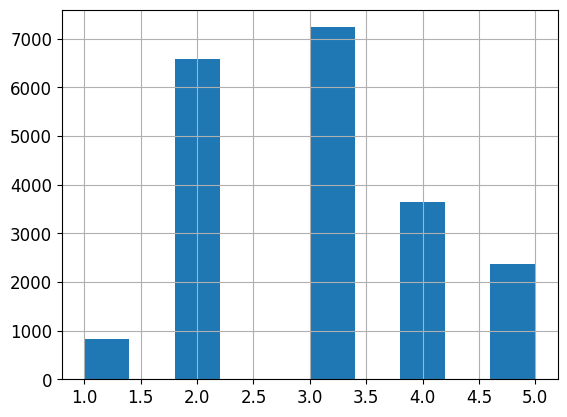

In [70]:
housing["income_cat"].hist()

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [72]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [73]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [74]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [75]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [76]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [77]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [78]:
# 원래 상태로 되돌림
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 이해를 위한 탐색과 시각화

In [79]:
# 데이터 복사본 만들기 (훈련데이터를 손상시키지 않기 위해)
housing = strat_train_set.copy()

#### 지리적 데이터 시각화

Saving figure bad_visualization_plot


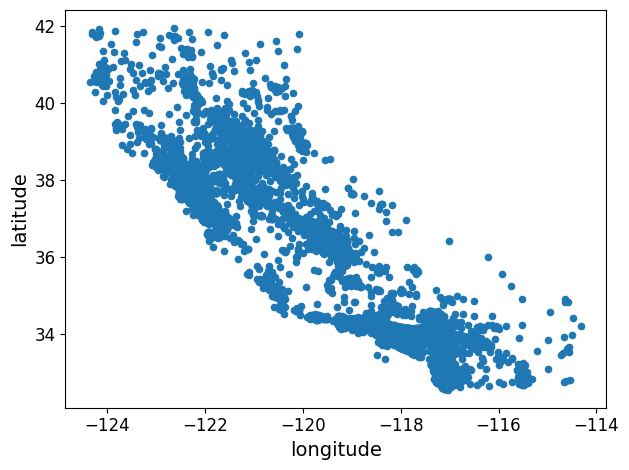

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

#### 밀집된 영역 표시

- alpha옵션

Saving figure better_visualization_plot


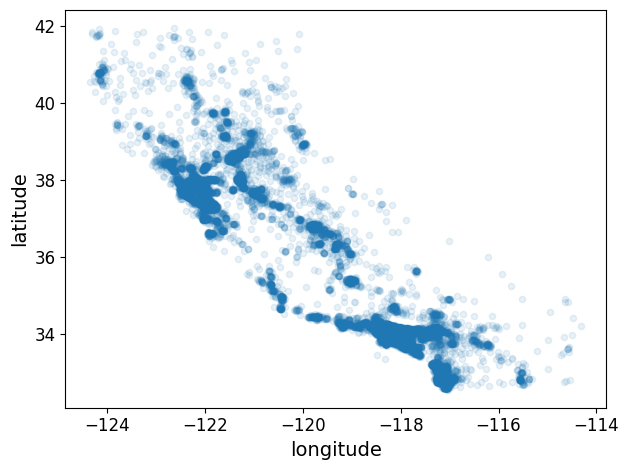

In [81]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

#### 더 다양한 정보 표시

- s: 원의 반지름 => 인구
- c: 색상 => 가격

Saving figure housing_prices_scatterplot


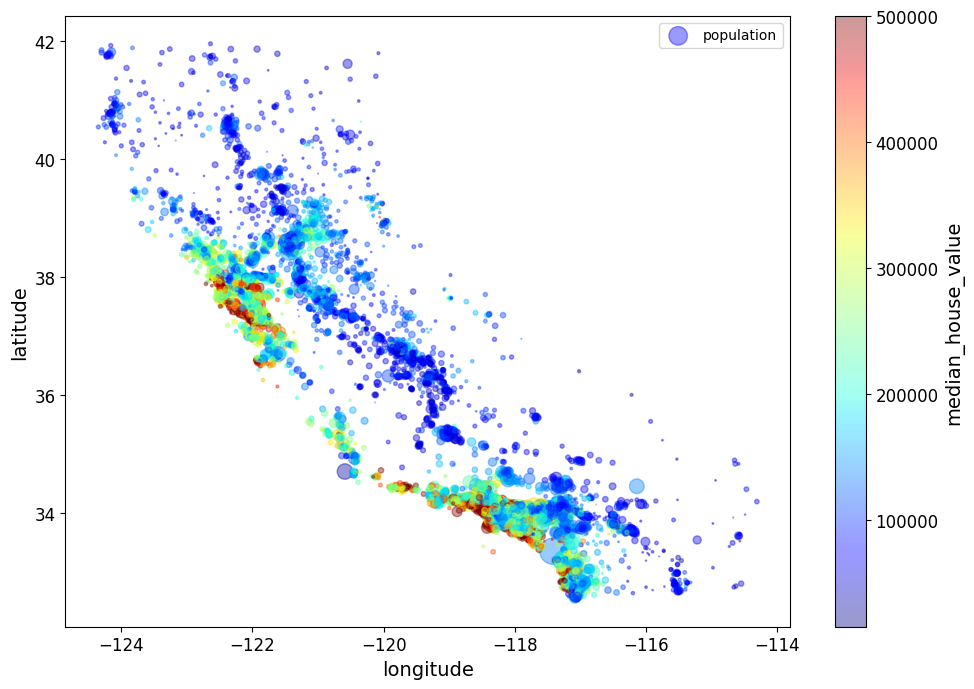

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap="jet", colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [83]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"

/var/folders/ss/2m7r0p153r5952kznb4w0rxr0000gq/T/ipykernel_26781/3071832456.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


Saving figure california_housing_prices_plot


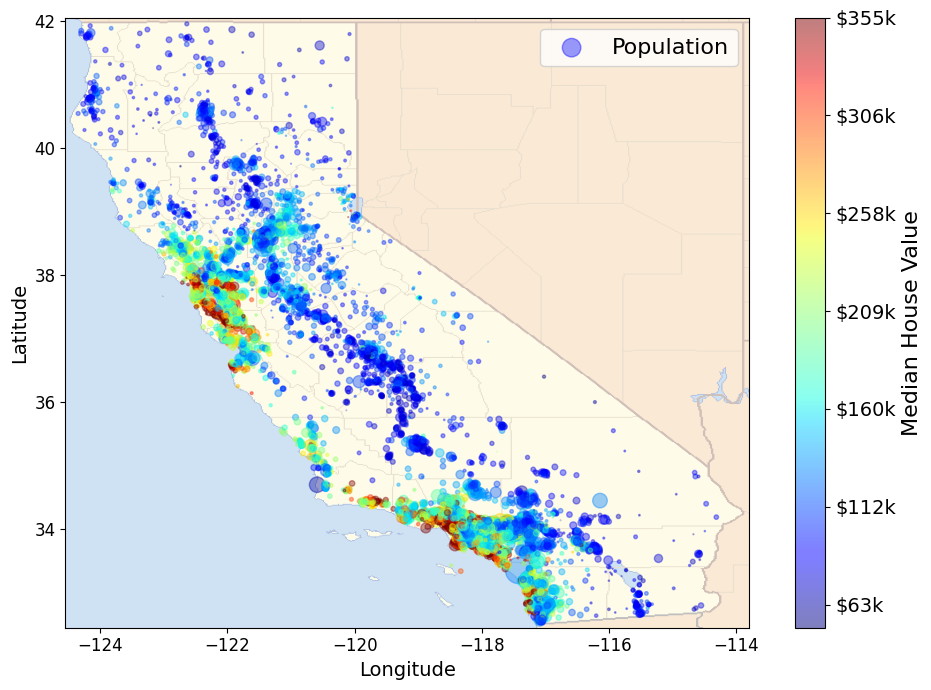

In [84]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap="jet",
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

위에서 관찰할 수 있는 사실은(주택가격이 높은 지역)?

#### 상관관계(Correlations) 관찰하기

In [85]:
corr_matrix = housing.corr()

/var/folders/ss/2m7r0p153r5952kznb4w0rxr0000gq/T/ipykernel_26781/2491629433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [86]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<div>
<img src="images/fig2-14.png" width="800"/>
</div>

#### scatter_matrix 사용해서 상관관계 확인하기

Saving figure scatter_matrix_plot


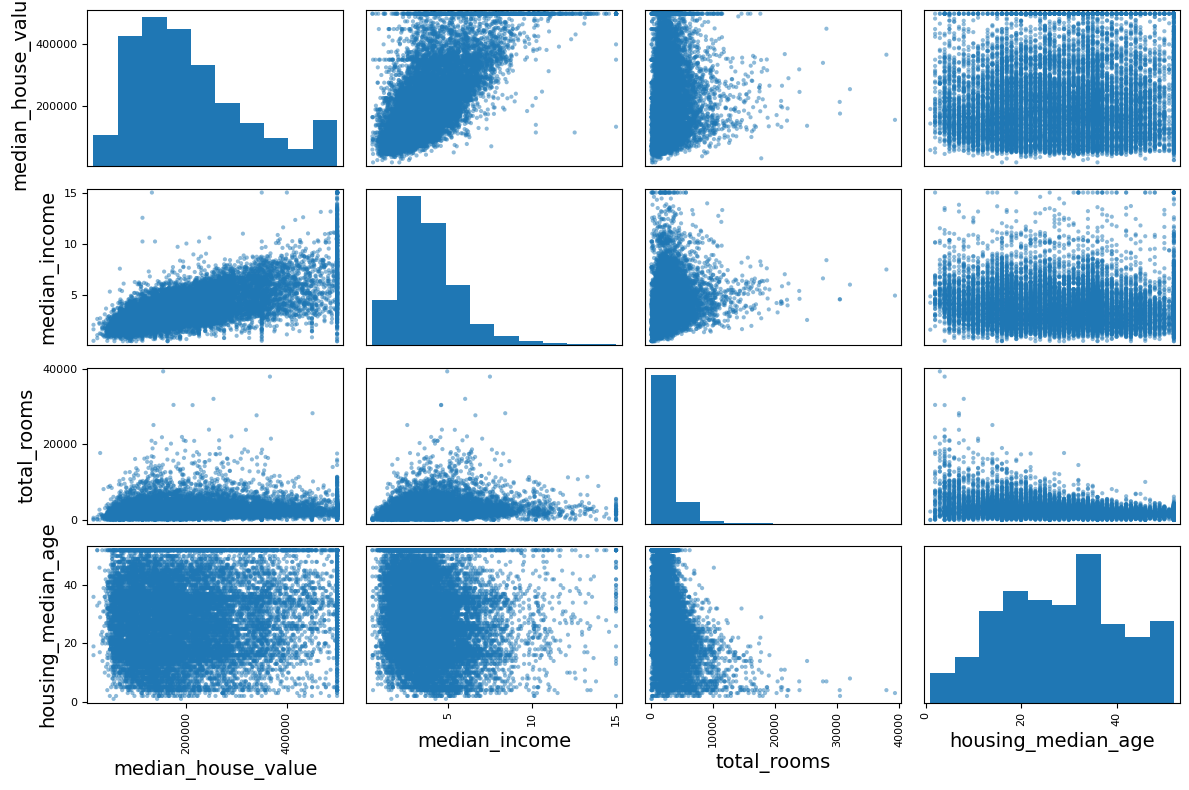

In [87]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# 특성 몇 개만 살펴봄 
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


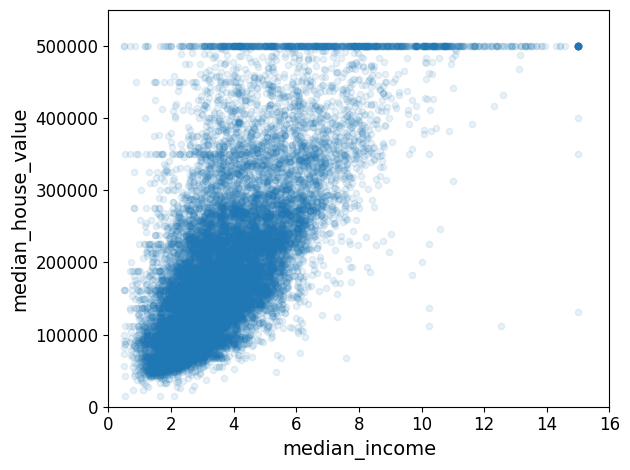

In [88]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

위에서 관찰할 수 있는 사실들?

#### 특성 조합들 실험

- 여러 특성(feature, attribute)들의 조합으로 새로운 특성을 정의해볼 수 있음
- 예를 들자면, 가구당 방 개수, 침대방(bedroom)의 비율, 가구당 인원

In [89]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [90]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/var/folders/ss/2m7r0p153r5952kznb4w0rxr0000gq/T/ipykernel_26781/692310030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

위에서 관찰할 수 있는 사실들?
- bedrooms_per_room
- rooms_per_household

데이터 탐색과정은 대부분 한 번으로 끝나지 않고 모델을 만들고 문제점을 분석한 뒤 다시 실행하게 됩니다.

### 머신러닝 알고리즘을 위한 데이터 준비

데이터 준비는 데이터 변환(data transformation)과정으로 볼 수 있습니다.

데이터 수동변환 vs. 자동변환(함수만들기)

데이터 자동변환의 장점들
- 새로운 데이터에 대한 변환을 손쉽게 재생산(reproduce)할 수 있습니다.
- 향후에 재사용(reuse)할 수 있는 라이브러리를 구축하게 됩니다.
- 실제 시스템에서 가공되지 않은 데이터(raw data)를 알고리즘에 쉽게 입력으로 사용할 수 있도록 해줍니다.
- 여러 데이터 변환 방법을 쉽게 시도해 볼 수 있습니다.

In [91]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### 데이터 정제(Data Cleaning)

누락된 특성(missing features) 다루는 방법들
- 해당 구역을 제거(행을 제거)
- 해당 특성을 제거(열을 제거)
- 어떤 값으로 채움(0, 평균, 중간값 등)

In [92]:
housing.isnull().any(axis=1)

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Length: 16512, dtype: bool

In [93]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() # True if there is a null feature
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [94]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [95]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [96]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [97]:
median

433.0

In [98]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


SimpleImputer 사용하기

In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [100]:
# 중간값은 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 제외한 복사본을 생성
housing_num = housing.drop("ocean_proximity", axis=1)

In [101]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [102]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [103]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

이제 학습된 imputer 객체를 사용해 누락된 값을 중간값으로 바꿀 수 있습니다.

In [104]:
X = imputer.transform(housing_num)

위 X는 NumPy array입니다. 이를 다시 pandas DataFrame으로 되돌릴 수 있습니다.

In [105]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

제대로 채워져 있는지 확인해봅니다.

In [106]:
sample_incomplete_rows.index.values

array([ 1606, 10915, 19150,  4186, 16885])

In [107]:
housing_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580


In [108]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


###  Estimator, Transformer, Predictor

- 추정기(estimator): 데이터셋을 기반으로 모델 파라미터들을 추정하는 객체를 추정기라고 합니다(예를 들자면 imputer). 추정자체는 fit() method에 의해서 수행되고 하나의 데이터셋을 매개변수로 전달받습니다(지도학습의 경우 label을 담고 있는 데이터셋을 추가적인 매개변수로 전달).


- 변환기(transformer): (imputer같이) 데이터셋을 변환하는 추정기를 변환기라고 합니다. 변환은 transform() method가 수행합니다. 그리고 변환된 데이터셋을 반환합니다.


- 예측기(predictor): 일부 추정기는 주어진 새로운 데이터셋에 대해 예측값을 생성할 수 있습니다. 앞에서 사용했던 LinearRegression도 예측기입니다. 예측기의 predict() method는 새로운 데이터셋을 받아 예측값을 반환합니다. 그리고 score() method는 예측값에 대한 평가지표를 반환합니다.

### 텍스트와 범주형 특성 다루기

In [109]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [110]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [111]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이 표현방식의 문제점?

- "특성의 값이 비슷할수록 두 개의 샘플이 비슷하다"가 성립할 때 모델학습이 쉬워짐


One-hot encoding

In [112]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

위 출력을 보면 일반적인 배열이 아니고 "sparse matrix"임을 알 수 있습니다.

In [113]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [114]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [115]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 나만의 변환기(Custom Transformers) 만들기

Scikit-Learn이 유용한 변환기를 많이 제공하지만 프로젝트를 위해 특별한 데이터 처리 작업을 해야 할 경우가 많습니다. 이 때 나만의 변환기를 만들 수 있습니다.

반드시 구현해야 할 method들
- fit()
- transform()

아래의 custom tranformer는 rooms_per_household, population_per_household 두 개의 새로운 특성을 데이터셋에 추가하며 add_bedrooms_per_room = True로 주어지면 bedrooms_per_room 특성까지 추가합니다. add_bedrooms_per_room은 하이퍼파라미터.

In [116]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Numpy데이터를 DataFrame으로 변환

In [117]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### 특성 스케일링(Feature Scaling)

- Min-max scaling: 0과 1사이의 값이 되도록 조정
- 표준화(standardization): 평균이 0, 분산이 1이 되도록 만들어 줌(사이킷런의 StandardScaler사용)

### 변환 파이프라인(Transformation Pipelines)

여러 개의 변환이 순차적으로 이루어져야 할 경우 Pipeline class를 사용하면 편합니다.

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

이름, 추정기 쌍의 목록

마지막 단계를 제외하고 모두 변환기여야 합니다(fit_transform() method를 가지고 있어야 함).

파이프라인의 fit() method를 호출하면 모든 변환기의 fit_transform() method를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달합니다. 마지막 단계에서는 fit() method만 호출합니다.

In [119]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

각 열(column) 마다 다른 파이프라인을 적용할 수도 있습니다! 예를 들어 수치형 특성들과 범주형 특성들에 대해 별도의 변환이 필요하다면 아래와 같이 ColumnTransformer를 사용하면 됩니다.

In [120]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [121]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [122]:
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

### 모델 훈련(Train a Model)

드디어 모델을 훈련시킬 준비가 되었습니다! 지난 시간에 배웠던 선형회귀모델(linear regression)을 사용해보겠습니다.

In [123]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

모델훈련은 딱 3줄의 코드면 충분합니다!

몇 개의 샘플에 모델을 적용해서 예측값을 확인해보고 실제값과 비교해보겠습니다.

In [124]:
lin_reg.coef_

array([-55649.63398453, -56711.59742892,  13734.72084192,  -1943.05586355,
         7343.22979731, -45709.28253579,  45453.26277662,  74714.15226133,
         6604.58396628,   1043.05452981,   9248.31607777, -18015.98870784,
       -55214.71083473, 110357.8461062 , -22484.65997391, -14642.48658971])

In [125]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(lin_reg.coef_, attributes), reverse=True)

[(110357.84610619556, 'ISLAND'),
 (74714.15226132631, 'median_income'),
 (45453.26277662227, 'households'),
 (13734.720841922426, 'housing_median_age'),
 (9248.31607776977, 'bedrooms_per_room'),
 (7343.229797309259, 'total_bedrooms'),
 (6604.583966284006, 'rooms_per_hhold'),
 (1043.0545298050663, 'pop_per_hhold'),
 (-1943.0558635498055, 'total_rooms'),
 (-14642.486589712364, 'NEAR OCEAN'),
 (-18015.98870783888, '<1H OCEAN'),
 (-22484.659973912116, 'NEAR BAY'),
 (-45709.28253579069, 'population'),
 (-55214.7108347322, 'INLAND'),
 (-55649.63398452753, 'longitude'),
 (-56711.59742891633, 'latitude')]

In [126]:
# 몇 개의 샘플에 대해 데이터변환 및 예측을 해보자
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared).round(decimals=1))

Predictions: [ 85657.9 305492.6 152056.5 186095.7 244550.7]


In [127]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


전체 훈련 데이터셋에 대한 RMSE를 측정해보겠습니다.

In [128]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

훈련 데이터셋의 RMSE가 이 경우처럼 큰 경우 => 과소적합(under-fitting)

과소적합이 일어나는 이유?
- 특성들(features)이 충분한 정보를 제공하지 못함
- 모델이 충분히 강력하지 못함

강력한 비선형모델인 DecisionTreeRegressor를 사용해보겠습니다.


<div>
<img src="images/decision_tree.png" width="400"/>
</div>

In [129]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [130]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

이 모델이 선형모델보다 낫다고 말할 수 있을까요? 어떻게 알 수 있을까요?

- 테스트 데이터셋을 이용한 검증
- 훈련 데이터셋의 일부를 검증데이터(validation data)셋으로 분리해서 검증
- k-겹 교차 검증(k-fold cross-validation)

### 교차 검증(Cross-Validation)을 사용한 평가

<div>
<img src="images/kfolds.png" width="500"/>
</div>

결정트리 모델에 대한 평가

In [131]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [132]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


선형회귀모델에 대한 평가

In [133]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71774.15825125 64114.99166359 67771.17124356 68627.7242824
 66848.58938823 72527.24321966 74023.75820358 68800.50640085
 66443.28836884 70147.43163952]
Mean: 69107.88626614638
Standard deviation: 2886.049299226037


RandomForestRegressor에 대한 평가


<div>
<img src="images/random_forest.png" width="500"/>
</div>

In [134]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [135]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [136]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


### 모델 세부 튜닝(Fine-Tune Your Model)

모델의 종류를 선택한 후에 모델을 세부 튜닝하는 것이 필요합니다. 모델 학습을 위한 최적의 하이퍼파라미터를 찾는 과정이라고 말할 수 있습니다.

#### 그리드 참색(Grid Search)

수동으로 하이퍼파라미터 조합을 시도하는 대신 GridSearchCV를 사용하는 것이 좋습니다.

In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [138]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [139]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [140]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

#### 랜덤 탐색(Randomized Search)

하이퍼파라미터 조합의 수가 큰 경우에 유리. 지정한 횟수만큼만 평가.

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe7b30aae60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe7b30aac20>},
                   random_state=42, scoring='neg_mean_squared_error')

In [142]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


#### 특성 중요도, 에러 분석

In [143]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [144]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

### 테스트 데이터셋으로 최종 평가하기

In [145]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [146]:
final_rmse

47873.26095812988

### 론칭, 모니터링, 시스템 유지 보수

$$$$
<div>
<img src="images/fig2-17.png" width="800"/>
</div>

상용환경에 배포하기 위해서 데이터 전처리와 모델의 예측이 포함된 파이프라인을 만들어 저장하는 것이 좋습니다.

In [147]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [148]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [149]:
my_model = full_pipeline_with_predictor

In [150]:
import joblib
joblib.dump(my_model, "my_model.pkl")
#...
my_model_loaded = joblib.load("my_model.pkl")

In [151]:
my_model_loaded.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

### 론칭후 시스템 모니터링

- 시간이 지나면 모델이 낙후되면서 성능이 저하


- 자동모니터링: 추천시스템의 경우, 추천된 상품의 판매량이 줄어드는지?


- 수동모니터링: 이미지 분류의 경우, 분류된 이미지들 중 일부를 전문가에게 검토시킴


- 결과가 나빠진 경우
  - 데이터 입력의 품질이 나빠졌는지? 센서고장?
  - 트렌드의 변화? 계절적 요인?

### 유지보수

- 정기적으로 새로운 데이터 수집(레이블)


- 새로운 데이터를 테스트 데이터로, 현재의 테스트 데이터는 학습데이터로 편입


- 다시 학습후, 새로운 테스트 데이터에 기반해 현재 모델과 새 모델을 평가, 비교


### 전체 프로세스에 고르게 시간을 배분해야 합니다!